<img align="center" src="./images/occiput_logo3.png" width="400">

# Zoomed PET  reconstruction 
This example of 3D PET reconstruction shows how to change the physical size and location of the reconstruction volume and of the attenuation map and their discretization grid (number of voxels). In this example we will first create activity and attenuation phantoms of given physical size and discretization grid and then reconstruct the activity in a volume of a different physical size and different number of voxels. We will then reconstruct with a smaller volume,  producing a zoomed high resolution reconstruction. 

In [1]:
import occiput_suite.occiput as occiput
import numpy
%pylab inline

/media/DATA/virtualenvs/occiputFeb2018/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
pet = occiput.Reconstruction.PET.PET_Static_Scan()

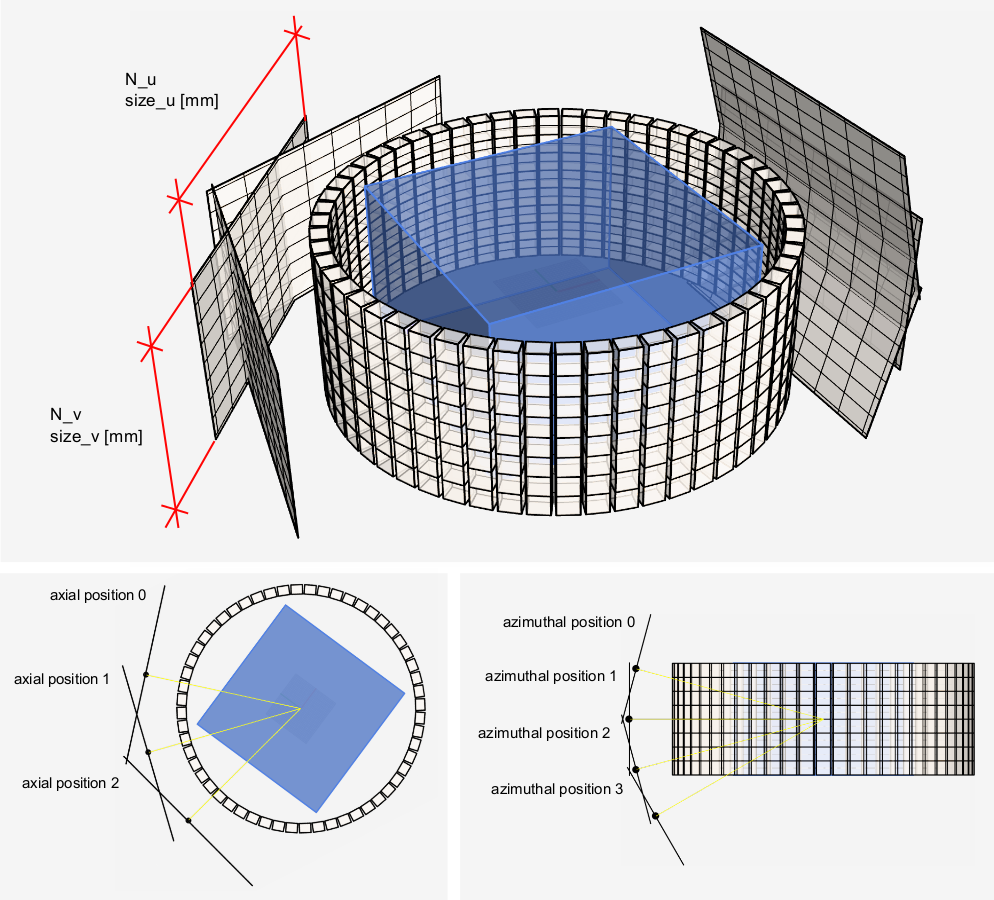

In [3]:
# Set dimensions of projection space (see Figure below): 
pet.binning.N_axial     = 150
pet.binning.N_azimuthal = 1
pet.binning.angles_axial = linspace(0,pi,pet.binning.N_axial)           #[radians]
pet.binning.angles_azimuthal = linspace(0,pi,pet.binning.N_azimuthal)   #[radians]
pet.binning.N_u    = 128     #[voxels]
pet.binning.N_v    = 128     #[voxels]
pet.binning.size_u = 200.0   #[mm]
pet.binning.size_v = 200.0   #[mm]

pet.binning.display_geometry()

In [4]:
# Let us create activity and attenuation phantoms with [128, 128, 128] voxels 
# and physical size [200.0 mm, 200.0 mm, 200.0 mm], then project them to obtain a simulation of a PET acquisition. 

phantom_activity_shape = [128,128,128]  #[voxels]
phantom_activity_size  = [200,200,200]  #[mm]

# Set dimensions of attenuation volume (it can be different from activity volume): 
phantom_attenuation_shape = [128,128,128]  #[voxels]
phantom_attenuation_size  = [200,200,200]  #[mm]

activity    = occiput.DataSources.Synthetic.Shapes.uniform_cylinder(phantom_activity_shape,axis=2, inner_value=10.0, outer_value=0.00, radius=0.2)
attenuation = occiput.DataSources.Synthetic.Shapes.uniform_cylinder(phantom_attenuation_shape,axis=2, inner_value=0.10, outer_value=0.00, radius=0.2)

pet.activity_size  = phantom_activity_size
pet.activity_shape = phantom_activity_shape
pet.attenuation_size  = phantom_attenuation_size
pet.attenuation_shape = phantom_attenuation_shape

pet.set_attenuation(attenuation)
projection = pet.project_activity(activity)

import copy
prompts = copy.deepcopy(projection)
prompts.data = numpy.random.poisson(prompts.data)
pet.set_prompts(prompts)

## Original FOV

In [5]:
# Let us now reconstruct the activity
print pet.activity_shape
print pet.activity_size
activity_recon = pet.osem_reconstruction(iterations=10, subset_size=200)

[128, 128, 128]
[200, 200, 200]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Projecting attenuation
Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

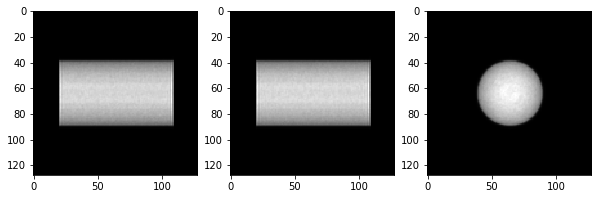

In [6]:
figure(figsize=(10,4))
subplot(1,3,1); imshow(activity_recon.data[:,64,:], cmap='gray')
subplot(1,3,2); imshow(activity_recon.data[64,:,:], cmap='gray')
subplot(1,3,3); imshow(activity_recon.data[:,:,64], cmap='gray')

## Zoom IN (same image shape, but different FOV dim)

In [7]:
# Let us now reconstruct the activity in volume with smaller physical (8X) and same number of voxels. 
# This results in a zoomed reconstruction at the same computational cost. 

pet.activity_shape = [128,128,128]
pet.activity_size  = [100.0,100.0,100.0]
activity_zoomed = pet.osem_reconstruction(iterations=10, subset_size=200)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

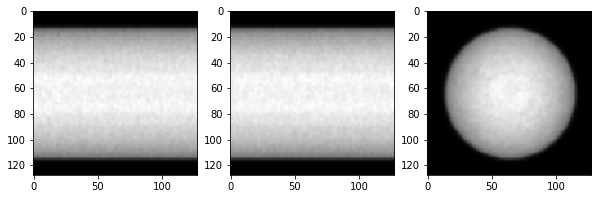

In [8]:
figure(figsize=(10,4))
subplot(1,3,1); imshow(activity_zoomed.data[:,64,:], cmap='gray')
subplot(1,3,2); imshow(activity_zoomed.data[64,:,:], cmap='gray')
subplot(1,3,3); imshow(activity_zoomed.data[:,:,64], cmap='gray')

## Resolution increase (same FOV size, with more pixels)

In [9]:
# Let us now reconstruct the activity in volume with smaller physical (8X) and with higher number of voxels (8X). 
# This results in a zoomed, high resolution reconstruction. 
# Notice that the attenuation volume has a different size and shape. The attenuation volume and activity 
# volume can have arbitrary, independent physical size and shape. 

pet.activity_shape = [220,220,220]
pet.activity_size  = [100.0,100.0,100.0]
activity_zoomed_hires = pet.osem_reconstruction(iterations=10, subset_size=200)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

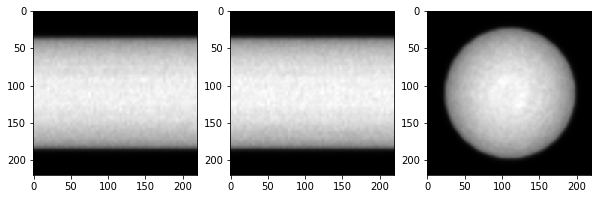

In [10]:
figure(figsize=(10,4))
subplot(1,3,1); imshow(activity_zoomed_hires.data[:,64,:], cmap='gray')
subplot(1,3,2); imshow(activity_zoomed_hires.data[64,:,:], cmap='gray')
subplot(1,3,3); imshow(activity_zoomed_hires.data[:,:,64], cmap='gray')